## Exploration

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())


train.csv shape is  (139753, 9)
test.csv shape is  (13976, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0  1049849  B000MR9D5E  A1EKSETIBS9ETQ                     0   
1   999834  B000GAKFIG   AR0HFYHYHDGQQ                     2   
2   218826  6300215776  A37S3ACL57LN62                    11   
3   796384  B00019071C  A1TO1P3NV7OAU6                     2   
4  1219784  B001NFNFN0   ATCM1W7HWIC6U                     0   

   HelpfulnessDenominator        Time  \
0                       0  1198281600   
1                       5  1245024000   
2                      15  1126137600   
3                       2  1351036800   
4                       0  1381708800   

                                             Summary  \
0  Great nature series, but not all scenes looked...   
1                 Agatha Christie's Marple: Series 2   
2                             Childish Entertainment   
3                       The weakest Babylon 5 season   
4                        

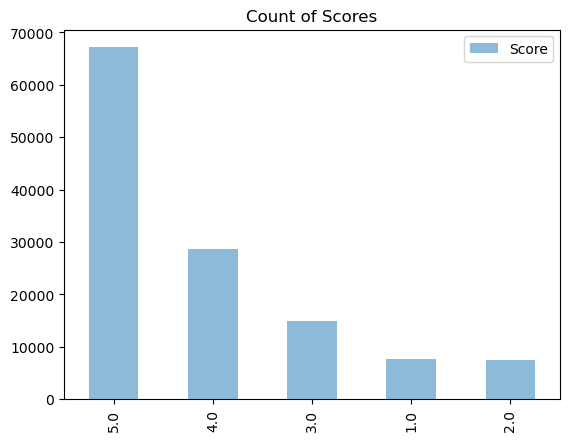

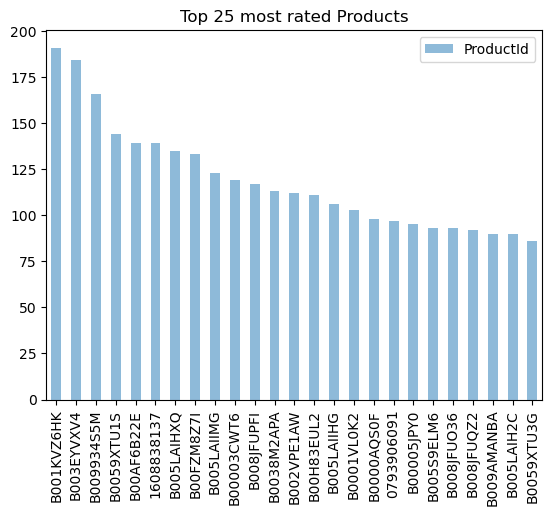

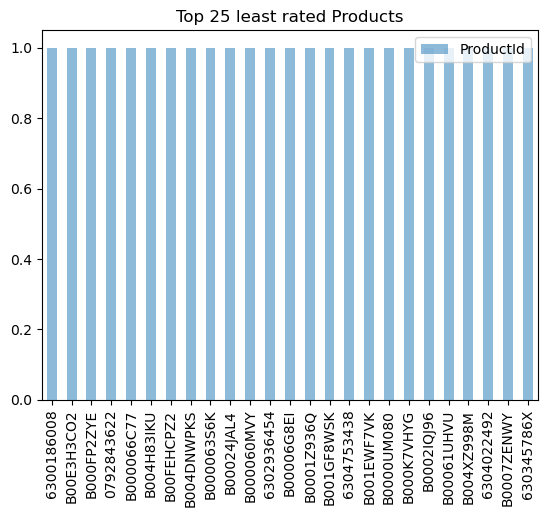

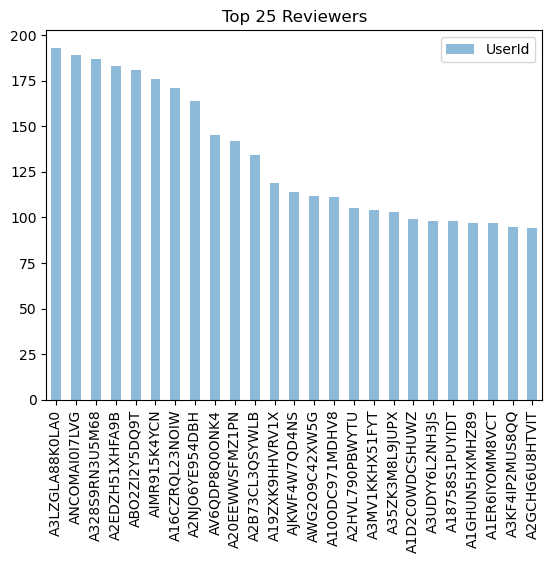

In [2]:
trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

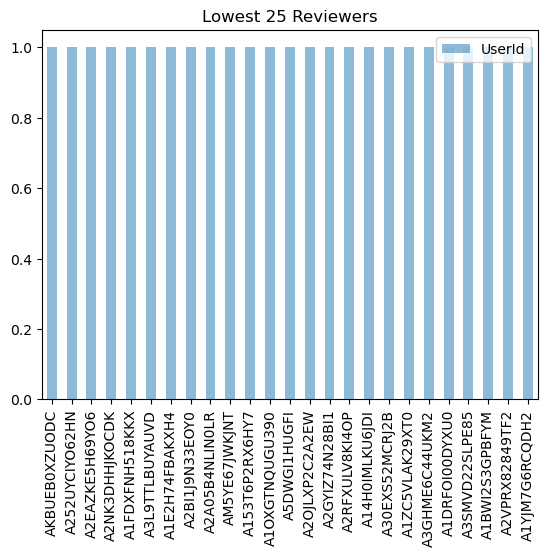

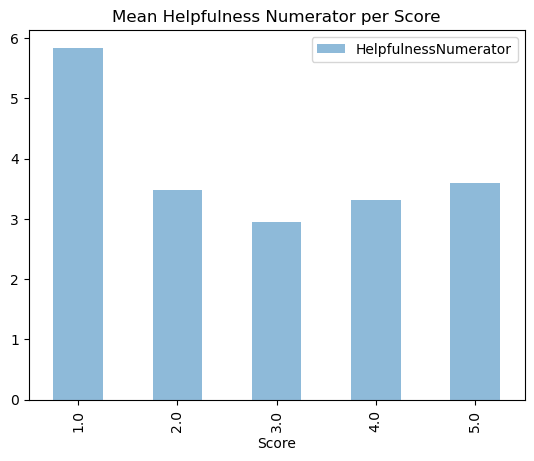

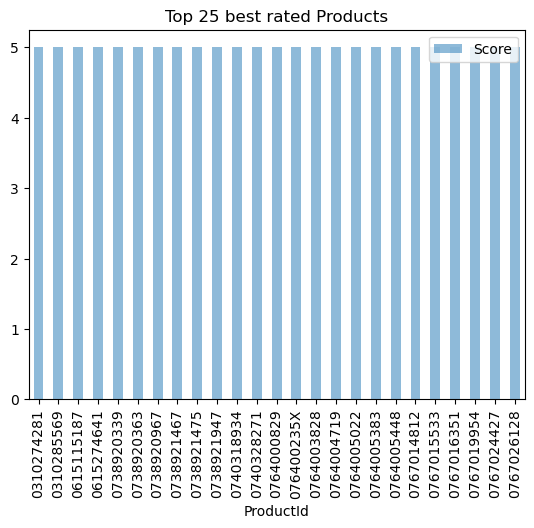

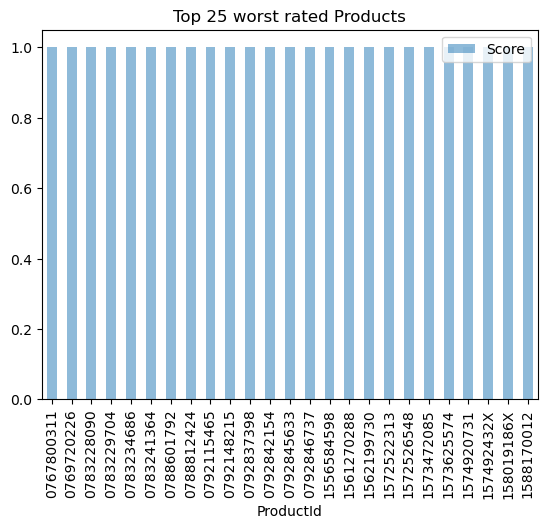

In [3]:
trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

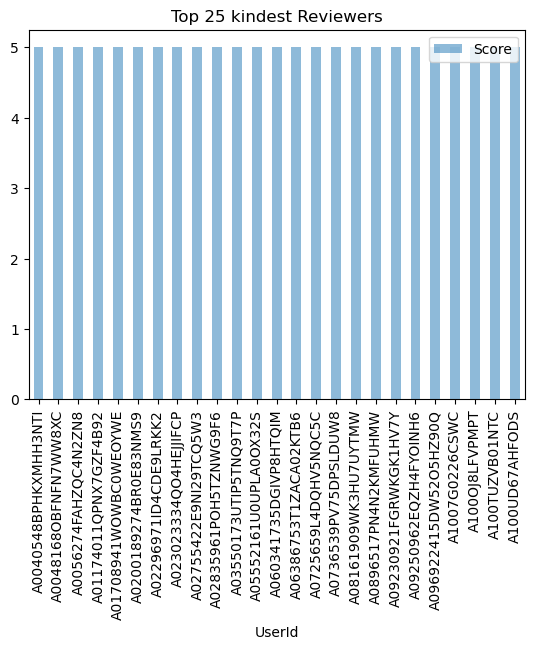

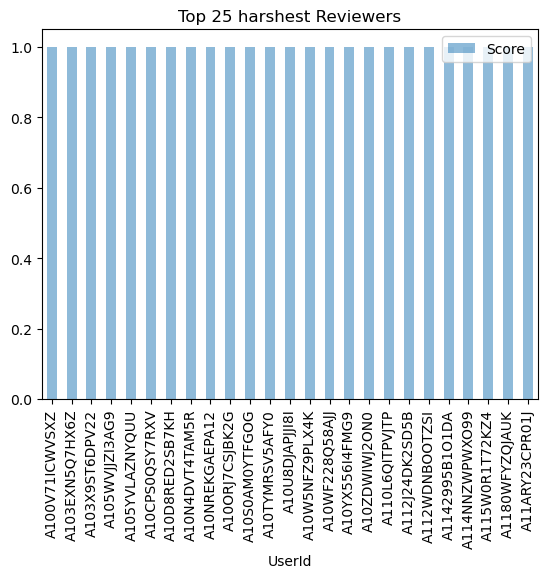

In [84]:
trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

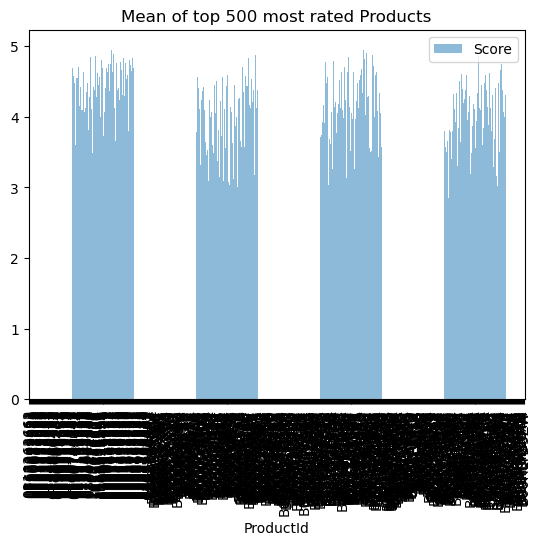

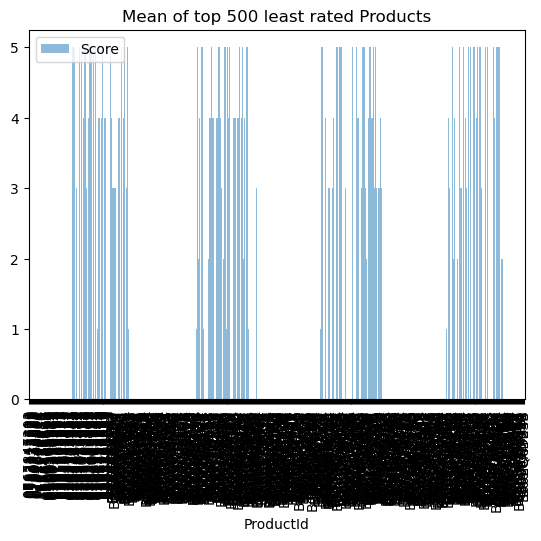

In [85]:
trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(500).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 500 most rated Products")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nsmallest(500).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 500 least rated Products")
plt.show()

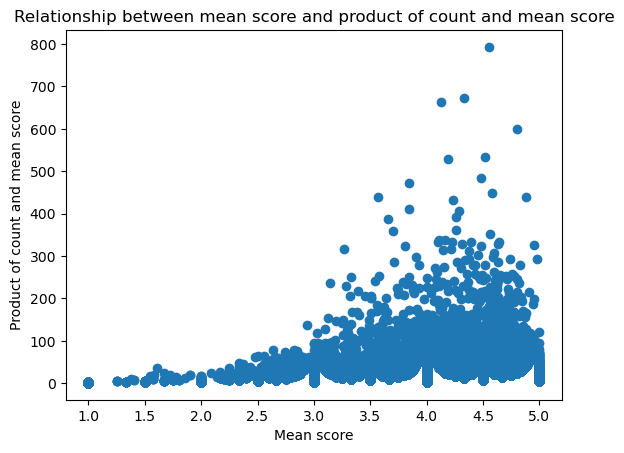

In [91]:
# Group the reviews by ProductId and calculate the count of reviews and the mean score for each product
product_stats = trainingSet.groupby('ProductId').agg({'Score': ['count', 'mean']})

# Flatten the column names to make it easier to work with
product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]

# Plot the mean score against the count of reviews using a scatter plot
plt.scatter(product_stats['Score_count'], product_stats['Score_mean'])
plt.xlabel('Number of reviews')
plt.ylabel('Mean score')
plt.title('Relationship between score and number of reviews')
plt.show()

## Feature Extraction

In [11]:
contraction_mapping = {"It's":"it is","it's":"it is", "its": "it is","ain't": "not", "aren't": "are not","can't": "can not", 'cannot':'can not',"'cause": "because",
        "could've": "could have", "couldn't": "could not", "didn't": "did not",
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
        "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
        "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
        "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
        "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is",
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
        "mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
        "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
        "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
        "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
        "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
        "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
        "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
        "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": 
        "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
        "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
        "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
        "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
        "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
        "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
        "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
        "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
        "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
        "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
        "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
        "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
        "you're": "you are", "you've": "you have" }

stop_words= ['yourself','yourselves','herself', 'themselves', 'himself', 'ourselves',
            'myself', 'between', 'whom', 'is', "she", 'here', 'your', 'each', 'we', 'he',
            'my', 'you', 'are', 'them', 'other','and', 'an', 'their', 'can', 'she', 'these',
            'ours', 'while', 'have', 'when', 'were', 'who', 'they', 'has', 'before', 'yours',
             "it", 'on',  'now', 'her', 'an', 'from', "would",'how', 'the', 'or', 'doing',
            'his',  'was', 'through', 'own', 'theirs', 'me', 'him', 'be', 'same', 'it', 'its', 
            'which', 'there','our', 'this', 'hers', 'being', 'did','those', 'i', 'does', 'will',
            'shall', 's','t','n','d', 'e','u', 'x','am','get','ve']


In [92]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet # to replace repeated words
import pkg_resources
from symspellpy import SymSpell, Verbosity # efficient spelling correction
import spacy
from spacy.cli.download import download as spacy_download
from spacy import load
import re


def expandContractions(text):
        updatedtext = ""
        text = str(text)
        for word in text.split():
            if word in contraction_mapping:
                updatedtext += contraction_mapping[word] + " "
            else:
                updatedtext += word + " "
        return updatedtext[:-1]

def tokenization(text):
        text = re.sub(r'www','https',text)
        text = re.sub(r'http[^\s]+','',text)
        text = re.sub('@[^\s]+','',text)
        tokenizer = RegexpTokenizer("[a-zA-Z]+", discard_empty=True)
        text = tokenizer.tokenize(text)
        text = " ".join(text)
        return text.lower()

# function to filter out stopwords
def removeStopwords(text):
        updatedtext = ""
        for word in text.split():
            if(word not in stop_words):
                updatedtext += word + " "

        return updatedtext[:-1]    

class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)    
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word    

dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
) 
      
# instantiating the sym spell object 
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
# loading the dictionary to match to the correct words
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
# instantiating the object for repeated character replacement
replacer = RepeatReplacer()        

sp = load("en_core_web_sm")


# function to correct misspelled words
def spellingCorrectionSymSpell(text):
        ans = ""
        for word in text.split():
            # checking for the spelling correction, returns empty ,if it didnt find a word
            # because include_unknown parameter (when false)
            # reason might be the words having repeated characters like gooooooood, excelllleeeeeeent etc
            # which go beyond the edit_distance of 2
            suggestions = sym_spell.lookup(word, Verbosity.TOP, max_edit_distance=2, include_unknown=False)
            if(len(suggestions) == 0):
                text = replacer.replace(word)
                # if still after correction the word is not found, we will skip that word(include_unk = True)
                suggestions = sym_spell.lookup(text, Verbosity.TOP, max_edit_distance=2, include_unknown=True)
            if(len(suggestions) > 0):
                text = str(suggestions[0])
                text = re.search(r'[a-zA-Z]+',str(text))
                ans += (text.group()) + " "
        return ans[:-1]

# function to lemmatization
def lemmatizeTextSpacy(text):
    lemmatizedList = ""
    text = sp(text)
    for word in text:
        lem_word = word.lemma_
        lemmatizedList += lem_word + " "
    return lemmatizedList[:-1]

In [95]:
def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)

    # Expanding contractions, Tokenization, stop words removed, correct misspelled words, lemmatization
    df['Summary'] = df['Summary'].apply(expandContractions).apply(tokenization).apply(removeStopwords).apply(spellingCorrectionSymSpell).apply(lemmatizeTextSpacy)
    df['Text'] = df['Text'].apply(expandContractions).apply(tokenization).apply(removeStopwords).apply(spellingCorrectionSymSpell).apply(lemmatizeTextSpacy)
    
    # Perform TF-IDF feature extraction on the 'Summary' column
    df['Summary'] = df['Summary'].fillna('')
    tfidf_vectorizer = TfidfVectorizer(max_features=500, min_df=10, stop_words='english', ngram_range=(1,3))
    summary_tfidf = tfidf_vectorizer.fit_transform(df['Summary'])
    summary_tfidf_df = pd.DataFrame(summary_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
    # Perform TF-IDF feature extraction on the 'Text' column
    df['Text'] = df['Text'].fillna('')
    tfidf_vectorizer = TfidfVectorizer(max_features=700, min_df=20, stop_words='english', ngram_range=(1,3))
    text_tfidf = tfidf_vectorizer.fit_transform(df['Text'])
    text_tfidf_df = pd.DataFrame(text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
#     # show tfidf score
#     tfidf_df = {'word': tfidf_vectorizer.get_feature_names_out(),
#              'tfidf': summary_tfidf.toarray().sum(axis=0).tolist()}
#     df_tfidf = pd.DataFrame(data1).sort_values(by="tfidf" ,ascending=False,ignore_index=True) 
#     df_tfidf.head(10)
    
    df = pd.concat([df, summary_tfidf_df, text_tfidf_df], axis=1)
    
    # Add sentiment analysis using TextBlob
    df['Summary_sentiment_polarity'] = df['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['Summary_sentiment_subjectivity'] = df['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    df['Text_sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['Text_sentiment_subjectivity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    
    scaler = MinMaxScaler()
    df['ReviewLength_normalized'] = scaler.fit_transform(df[['ReviewLength']])
    df['Time_normalized'] = scaler.fit_transform(df[['Time']])
#     df['Summary_sentiment_polarity_normalized'] = scaler.fit_transform(df[['Summary_sentiment_polarity']])
#     df['Text_sentiment_polarity_normalized'] = scaler.fit_transform(df[['Text_sentiment_polarity']])
    
    # Create a new column with the number of reviews of the ProductId
#     df["num_product_reviews"] = df.groupby("ProductId")["Id"].transform("count")
    
    # Create a new column with the mean socre of the ProductId
    df['avg_score'] = df.groupby('ProductId')['Score'].transform('mean')

    # Create a new column with the mean socre of the ProductId times the number of reviews of the ProductId
#     df['num_product_reviews_X_avg_score'] = df['num_product_reviews'] * df['avg_score']
    
    # Dropping columns
    df = df.drop(['Time', 'ReviewLength'], axis=1)
    
    return df

## Creating your model

In [96]:
# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
# This line creates a new DataFrame called trainX by selecting only the rows in train_processed 
#     where the "Score" column is not null. 
# This assumes that the "Score" column is the target variable that we want to predict.
trainX =  train_processed[train_processed['Score'].notnull()]

In [98]:
# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)
# testX.to_csv("./data/X_test_NLP_9feature_500-700.csv", index=False)
# trainX.to_csv("./data/X_train_NLP_9feature_500-700.csv", index=False)

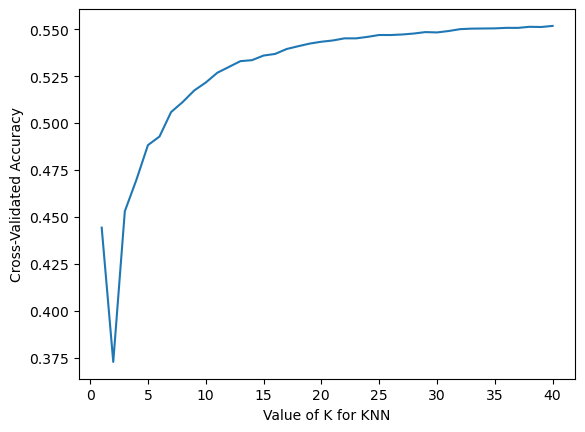

In [19]:
# # plot to see clearly
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()

In [99]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.decomposition import PCA

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")
# X_train = pd.read_csv("./data/X_train_NLP_9feature_500-700.csv")

# Split training set into training and testing set
# X_train and Y_train are the training data (features and target variable)
# X_test and Y_test are the validation data (features and target variable)
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )

# This is where you can do more feature selection
X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])

scaler = MinMaxScaler()
X_train_processed['Summary_sentiment_polarity_normalized'] = scaler.fit_transform(X_train_processed[['Summary_sentiment_polarity']])
X_train_processed['Text_sentiment_polarity_normalized'] = scaler.fit_transform(X_train_processed[['Text_sentiment_polarity']])
X_test_processed['Summary_sentiment_polarity_normalized'] = scaler.fit_transform(X_test_processed[['Summary_sentiment_polarity']])
X_test_processed['Text_sentiment_polarity_normalized'] = scaler.fit_transform(X_test_processed[['Text_sentiment_polarity']])
X_train_processed = X_train_processed.drop(columns=['Summary_sentiment_polarity', 'Text_sentiment_polarity'])
X_test_processed = X_test_processed.drop(columns=['Summary_sentiment_polarity', 'Text_sentiment_polarity'])


print(X_train_processed.head())
print(X_test_processed.head())
X_train_processed.to_csv("./data/X_train_processed.csv", index=False)
X_test_processed.to_csv("./data/X_test_processed.csv", index=False)

# # choose k between 1 to 31
# k_range = range(1, 41)
# k_scores = []
# # use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k)
#     cross_validation_scores = cross_val_score(model, X_train_processed, Y_train, cv=5, scoring='accuracy')
#     k_scores.append(cross_validation_scores.mean())


# # Learn the model
# model = KNeighborsClassifier(n_neighbors=20)
# # model = model.fit(X_train_processed, Y_train)
# # Use 5-fold cross-validation
# cross_validation_scores = cross_val_score(model, X_train_processed, Y_train, cv=5)
# print("Cross-validation scores = ", cross_validation_scores)
# print("Mean cross-validation score = ", cross_validation_scores.mean())
# model = model.fit(X_train_processed, Y_train)


    
# pickle model - saves it so you can load it later
# with open('Tfidf(300,30)-Tfidf(300,50)-LGBM(158)-TextBlob.obj', 'wb') as f:
#         pickle.dump(model, f)

# to load pickled model: 
# with open('Tfidf(400,10)-Tfidf(400,10)-LGBM(158)-TextBlob.obj', 'rb') as f:
#    model = pickle.load(f)


        HelpfulnessNumerator  HelpfulnessDenominator  Helpfulness   10   3d  \
115330                     0                       0     0.000000  0.0  0.0   
17624                      1                       2     0.500000  0.0  1.0   
30519                      1                       1     1.000000  0.0  0.0   
8247                     146                     151     0.966887  0.0  0.0   
36131                      0                       1     0.000000  0.0  0.0   

         80  absolutely  acted  acting  action  ...     yes.1      york  \
115330  0.0         0.0    0.0     0.0     0.0  ...  0.000000  0.000000   
17624   0.0         0.0    0.0     0.0     0.0  ...  0.000000  0.000000   
30519   0.0         0.0    0.0     0.0     0.0  ...  0.000000  0.000000   
8247    0.0         0.0    0.0     0.0     0.0  ...  0.058903  0.000000   
36131   0.0         0.0    0.0     0.0     0.0  ...  0.000000  0.235819   

         young.1  Summary_sentiment_subjectivity  Text_sentiment_subjectiv

In [100]:
#7 models are adopted to compare the test set accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# # Logistic Regression
# model1 =  LogisticRegression(C=1e10,max_iter=10000)
# # Naive Bayes
# model2 = MultinomialNB()
# # KNN
# model3 = KNeighborsClassifier(n_neighbors=20)
# # Decision Tree
# model4 = DecisionTreeClassifier()
# # Random Forest
# model5= RandomForestClassifier(n_estimators=200,  max_features='sqrt')
# # Gradient Boosting
# model6 = GradientBoostingClassifier()
# Light Gradient Boosting Machine
model7 = LGBMClassifier(n_estimators=155)
# model_list=[model1,model2,model3,model4,model5,model6,model7]
# model_name=['LogisticRegression','MultinomialNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','LGBMClassifier']    
model_list=[model7]
model_name=['LGBMClassifier']
scores=[]
for i in range(len(model_list)):
    model_C=model_list[i]
    name=model_name[i]
    model_C.fit(X_train_processed, Y_train)
    s=model_C.score(X_test_processed, Y_test)
    scores.append(s)
    print(f'{name}: accuracy {round(s,3)}')

LogisticRegression: accuracy 0.669
MultinomialNB: accuracy 0.582


/Users/haoxuansun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier: accuracy 0.614
DecisionTreeClassifier: accuracy 0.566
RandomForestClassifier: accuracy 0.64
GradientBoostingClassifier: accuracy 0.671
LGBMClassifier: accuracy 0.693


In [87]:
# with open('norm(RL-Time-SSP-TSP)_SSS-TSS-HD-HN-H_NLP_summaryTfidf(500,10)_textTfidf(700,20)_LGBM(155)_TextBlob.obj', 'wb') as f:
#         pickle.dump(model7, f)

Accuracy on testing set =  0.6926061377007473
MSE on testing set =  0.6248370170138337


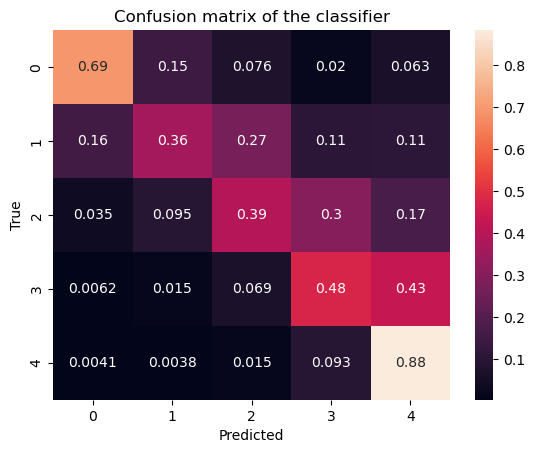

In [101]:
# Evaluate your model on the testing set
Y_test_predictions = model7.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("MSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))
# print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions, squared=False))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

135
140
145
150
155
160
165


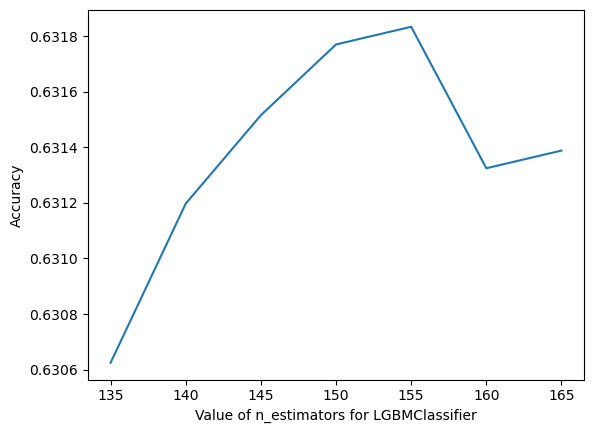

In [89]:
# plot accuracy VS n_estimators (from 140 to 169)
# choose n_estimators between 140 to 170
n_estimators_range = range(100, 300, 20)
n_estimators_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for n_estimators in n_estimators_range:
    print(n_estimators)
    model = LGBMClassifier(n_estimators=n_estimators)
    model.fit(X_train_processed, Y_train)
    s = model.score(X_test_processed, Y_test)
    n_estimators_scores.append(s)

# plot to see clearly
plt.plot(n_estimators_range, n_estimators_scores)
plt.xlabel('Value of n_estimators for LGBMClassifier')
plt.ylabel('Accuracy')
plt.show()

## Create the Kaggle submission

In [103]:
X_submission = pd.read_csv("./data/X_test.csv")
# X_submission = pd.read_csv("./data/X_test_NLP_9feature_500-700.csv")

X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

X_submission['Score'] = model7.predict(X_submission_processed)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

Now you can upload the `submission.csv` to kaggle